In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('C:/Users/Arcry/SkillBox/ML_HSE/files/gbm-data.csv')

In [3]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
gbm = GradientBoostingClassifier(n_estimators=250, learning_rate=0.2, verbose=True, random_state=241)

In [65]:
gbm.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2613           10.96s
         2           1.1715           10.79s
         3           1.1009           10.70s
         4           1.0529           10.64s
         5           1.0130           10.68s
         6           0.9740           10.70s
         7           0.9475           10.62s
         8           0.9197           10.59s
         9           0.8979           10.55s
        10           0.8730           10.54s
        20           0.7207            9.95s
        30           0.6055            9.46s
        40           0.5244            9.04s
        50           0.4501            8.61s
        60           0.3908            8.26s
        70           0.3372            7.80s
        80           0.3009            7.35s
        90           0.2603            6.90s
       100           0.2327            6.45s
       200           0.0835            2.17s


GradientBoostingClassifier(learning_rate=0.2, n_estimators=250,
                           random_state=241, verbose=True)

In [47]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

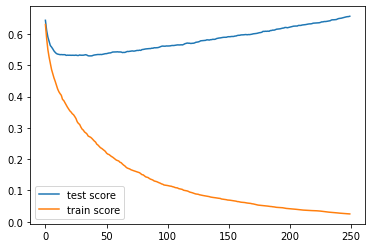

In [75]:
test_score = np.empty(len(gbm.estimators_))
train_score = np.empty(len(gbm.estimators_))

for i, pred in enumerate(gbm.staged_predict_proba(X_test)):
    test_score[i] = log_loss(y_test, pred)

for i, pred in enumerate(gbm.staged_predict_proba(X_train)):
    train_score[i] = log_loss(y_train, pred)

plt.plot(test_score)
plt.plot(train_score)
plt.legend(['test score', 'train score'])

In [27]:
from sklearn.metrics import log_loss

In [67]:
log_loss(y_test, gbm.predict_proba(X_test))

0.6570367033329095

In [76]:
np.argmin(test_score)

36

In [78]:
test_score.min()

0.5301645204906471

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
clf = RandomForestClassifier(n_estimators=36, random_state=241, verbose=5)

In [56]:
clf.fit(X_train, y_train)

building tree 1 of 36
building tree 2 of 36
building tree 3 of 36
building tree 4 of 36
building tree 5 of 36
building tree 6 of 36
building tree 7 of 36
building tree 8 of 36
building tree 9 of 36
building tree 10 of 36
building tree 11 of 36
building tree 12 of 36
building tree 13 of 36
building tree 14 of 36
building tree 15 of 36
building tree 16 of 36
building tree 17 of 36
building tree 18 of 36
building tree 19 of 36
building tree 20 of 36
building tree 21 of 36
building tree 22 of 36
building tree 23 of 36
building tree 24 of 36
building tree 25 of 36
building tree 26 of 36
building tree 27 of 36
building tree 28 of 36
building tree 29 of 36
building tree 30 of 36
building tree 31 of 36
building tree 32 of 36
building tree 33 of 36
building tree 34 of 36
building tree 35 of 36
building tree 36 of 36


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.1s finished


RandomForestClassifier(n_estimators=36, random_state=241, verbose=5)

In [57]:
log_loss(y_test, clf.predict_proba(X_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s finished


0.5415685811957381